In [1]:
#!pip install opencv-python

# Import Dependancies

In [2]:
import tensorflow as tf
import os

# Set GPU if Available

In [3]:
#Avoid out of memory errors by setting GPU memory growth

for  gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu,True)

# Remove doggy images

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imghdr

C:\Users\user\AppData\Local\Temp\ipykernel_19900\278217172.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
path = "D:\Programming\Machine Learning\Projects\Image Classifier\images"

In [6]:
os.listdir(path)     #navigate to desired path
exts = ['jpeg','jpg','bmp','png']

In [7]:
nav = os.path.join(path,'happy')   #navigate to the directory by joining the path and its component directory happy
os.listdir(nav)

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'AKPQZvzZcxbw6BdMRLT97w2jGJZguUPBi7slUAlDYpV-s64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion-900x387.jpg',
 'dv2051009.jpg',
 'es_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'file-20230208-27-3jttof.jpg',
 'FitnessMarketingHappy

## Check files were in correct extension and if not remove them

In [8]:
for img_classes in os.listdir(path):
    for image in os.listdir(os.path.join(path,img_classes)):
        image_path = os.path.join(path,img_classes,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #if image_path.lower().endswith(('.jpeg','.jpg','.bmp','.png')) == False:
            #    print('Image is not in correct extension {}'.format(image_path))
            #    os.remove(image_path)
            
            if tip not in exts:
                print('Image is not in correct extension {}'.format(image_path))
                os.remove(image_path)
            
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# Load Data

use below API to preprocess and label into the classes by looking at number of directories

In [9]:
tf.keras.utils.image_dataset_from_directory??

In [10]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 304 files belonging to 2 classes.


In [11]:
#data cannot access by directly. so, use iterator to access data from pipeline

data_iterator = data.as_numpy_iterator()

In [12]:
#get batch from the iterator
batch = data_iterator.next()

In [13]:
#Images represented as numpy arrays

#batch[0]
batch[0].shape

(32, 256, 256, 3)

In [14]:
#class 1 = Sad People
#class 0 = Happy people

batch[1]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

# Visualize some of data

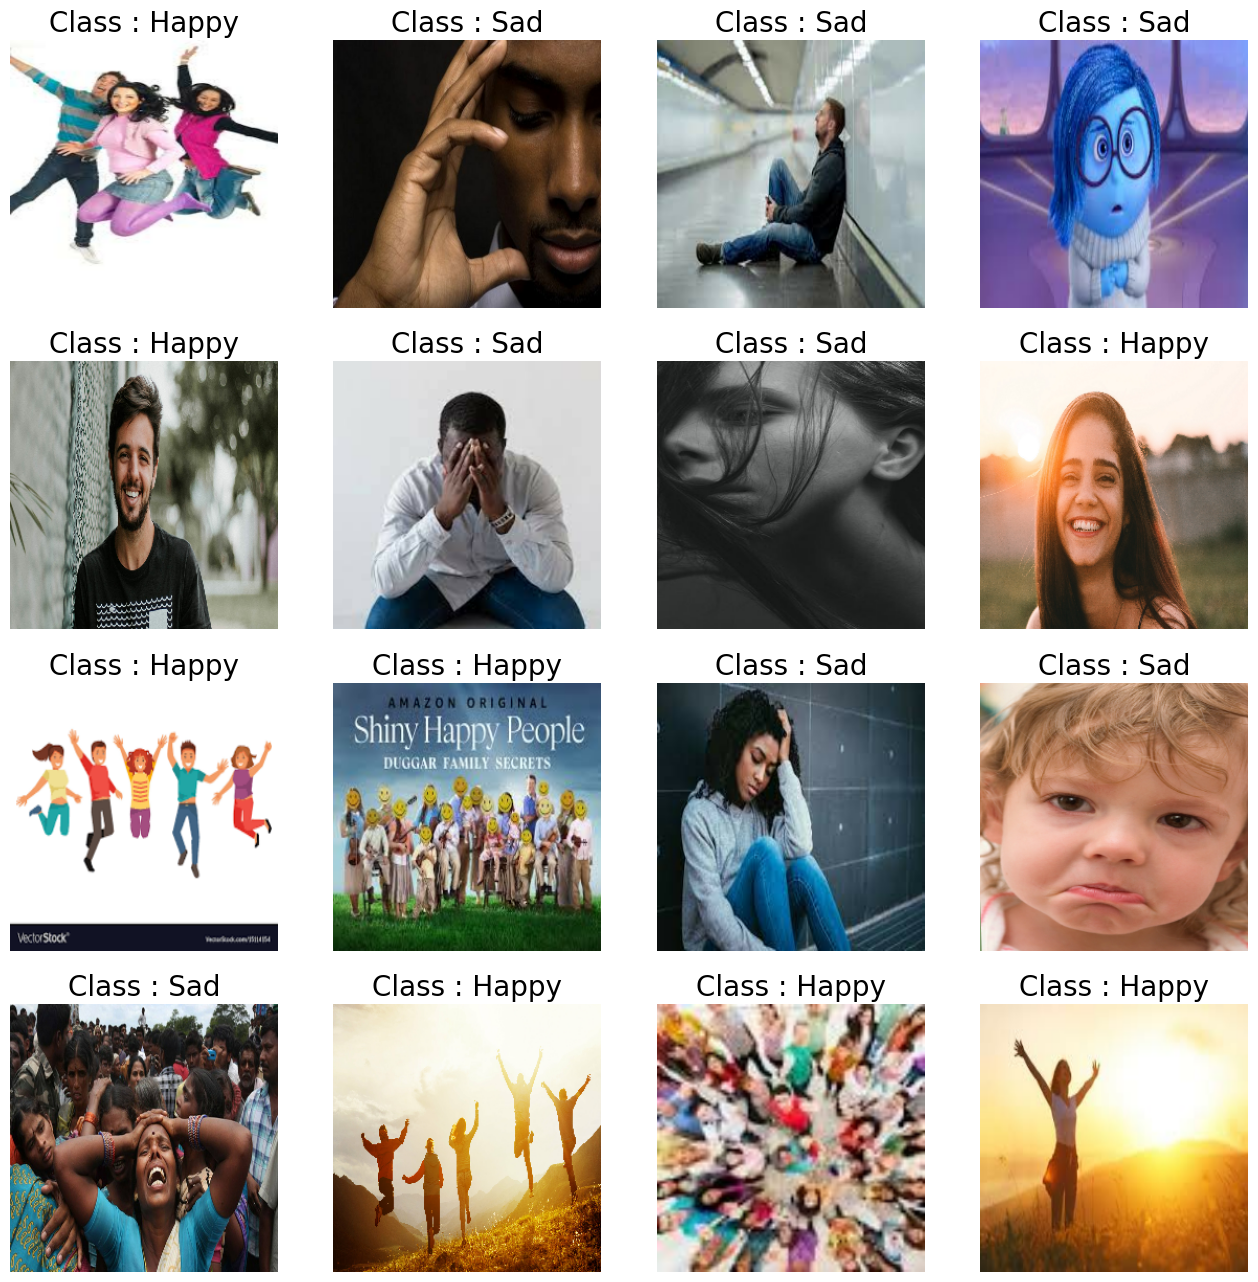

In [15]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(16,16))
ax = ax.flatten()
for idx,img in enumerate(batch[0][:16]):
    ax[idx].imshow(img.astype(int))
    ax[idx].axis('off')
    ax[idx].set_title("Class : {}".format("Happy" if batch[1][idx] == 0 else "Sad"),fontsize=20)

# Preprocess Data in Pipeline

### Scale data

In [16]:
data = data.map(lambda x,y:(x/255,y))

In [17]:
data.as_numpy_iterator().next()[0]

array([[[[6.27451017e-02, 6.27451017e-02, 6.27451017e-02],
         [6.27451017e-02, 6.27451017e-02, 6.27451017e-02],
         [6.27451017e-02, 6.27451017e-02, 6.27451017e-02],
         ...,
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02],
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02],
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02]],

        [[6.27451017e-02, 6.27451017e-02, 6.27451017e-02],
         [6.27740622e-02, 6.27740622e-02, 6.27740622e-02],
         [6.29057065e-02, 6.29057065e-02, 6.29057065e-02],
         ...,
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02],
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02],
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02]],

        [[6.27451017e-02, 6.27451017e-02, 6.27451017e-02],
         [6.29057065e-02, 6.29057065e-02, 6.29057065e-02],
         [6.36357293e-02, 6.36357293e-02, 6.36357293e-02],
         ...,
         [1.56862754e-02, 1.56862754e-02, 1.56862754e-02],
         [

### Split data

In [18]:
len(data)

10

In [19]:
train_size = 7
val_size = 2
test_size = 1

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model with CNN

### Build Convolution Neural Network

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [22]:
#Sequentioal API for Fully connected layers
model = Sequential()

#Apply convolution by 16 of 3x3 kernels then use pooling to reduce dimensions 
model.add(Conv2D(16,kernel_size=(3,3),strides=1, activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

#Apply convolution by 32 of 3x3 kernels then use pooling to reduce dimensions
model.add(Conv2D(32,kernel_size=(3,3),strides=1, activation='relu'))
model.add(MaxPooling2D())

#Apply convolution by 32 of 3x3 kernels then use pooling to reduce dimensions
model.add(Conv2D(32,kernel_size=(3,3),strides=1, activation='relu'))
model.add(MaxPooling2D())

#convert image into single numpy array
model.add(Flatten())

#Create fully connected Dense layer
model.add(Dense(units=128,activation='relu'))

#create output layer
model.add(Dense(units=1,activation='sigmoid'))

### Compile the model

In [23]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

### Train the CNN

In [25]:
logdir = 'logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
history = model.fit(train,epochs=20,validation_data=val,verbose=1,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 0.7986 - accuracy: 0.5134 - val_loss: 0.6503 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 8s 980ms/step - loss: 0.5845 - accuracy: 0.7188 - val_loss: 0.6537 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 8s 984ms/step - loss: 0.4933 - accuracy: 0.7812 - val_loss: 0.3545 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.4081 - accuracy: 0.8348 - val_loss: 0.3918 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.3663 - accuracy: 0.8482 - val_loss: 0.2596 - val_accuracy: 0.9531
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2420 - accuracy: 0.9196 - val_loss: 0.3523 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2613 - accuracy: 0.8929 - val_loss: 0.1278 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

### Plot the performance

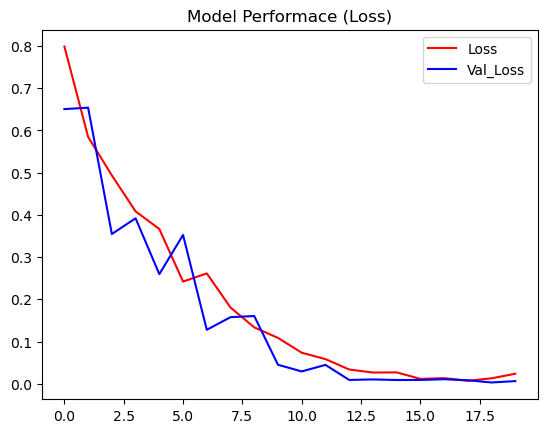

In [28]:
plt.plot(history.history['loss'],color='red',label='Loss')
plt.plot(history.history['val_loss'],color='blue',label='Val_Loss')
plt.title('Model Performace (Loss)')
plt.legend(loc='upper right')
plt.show()

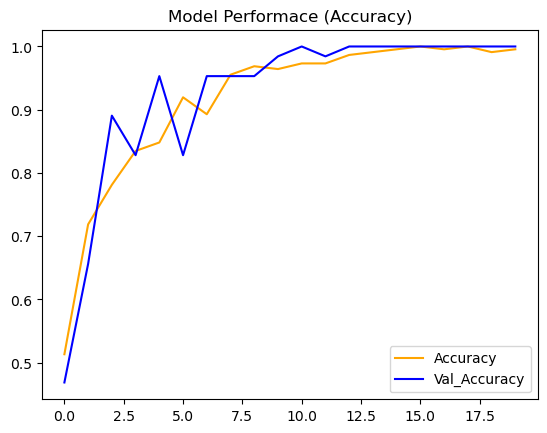

In [29]:
plt.plot(history.history['accuracy'],color='orange',label='Accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='Val_Accuracy')
plt.title('Model Performace (Accuracy)')
plt.legend(loc='lower right')
plt.show()

# Evaluate Model Performance

In [30]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 237ms/step


In [33]:
print(f'Precision : {pre.result().numpy()}')
print(f'Recall : {re.result().numpy()}')
print(f'Accuracy : {acc.result().numpy()}')

Precision : 1.0
Recall : 1.0
Accuracy : 1.0


# Save the Model

In [34]:
model.save("happysadmodel.h5")

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test the Model

In [2]:
from tensorflow.keras.models import load_model

new_model = load_model("happysadmodel.h5")

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
batch_size = 16

In [5]:
batch_images = []
image_paths = "D:\\Programming\\Machine Learning\\Projects\\Image Classifier\\test"

In [6]:
for image_path in os.listdir(image_paths):
    image = cv2.imread(os.path.join(image_paths,image_path))
    image = cv2.resize(image, (256, 256))  # Resize images to a uniform size
    #image = image.astype(np.float32) / 255.0  # Normalize image values between 0 and 1
    batch_images.append(image)

In [7]:
batch_images[0].shape

(256, 256, 3)

In [8]:
images = tf.constant(batch_images)
batch = tf.stack(images, axis=0)

In [9]:
ypred = new_model.predict(batch)

1/1 [==============================] - 1s 503ms/step


In [10]:
ypred = list(ypred)

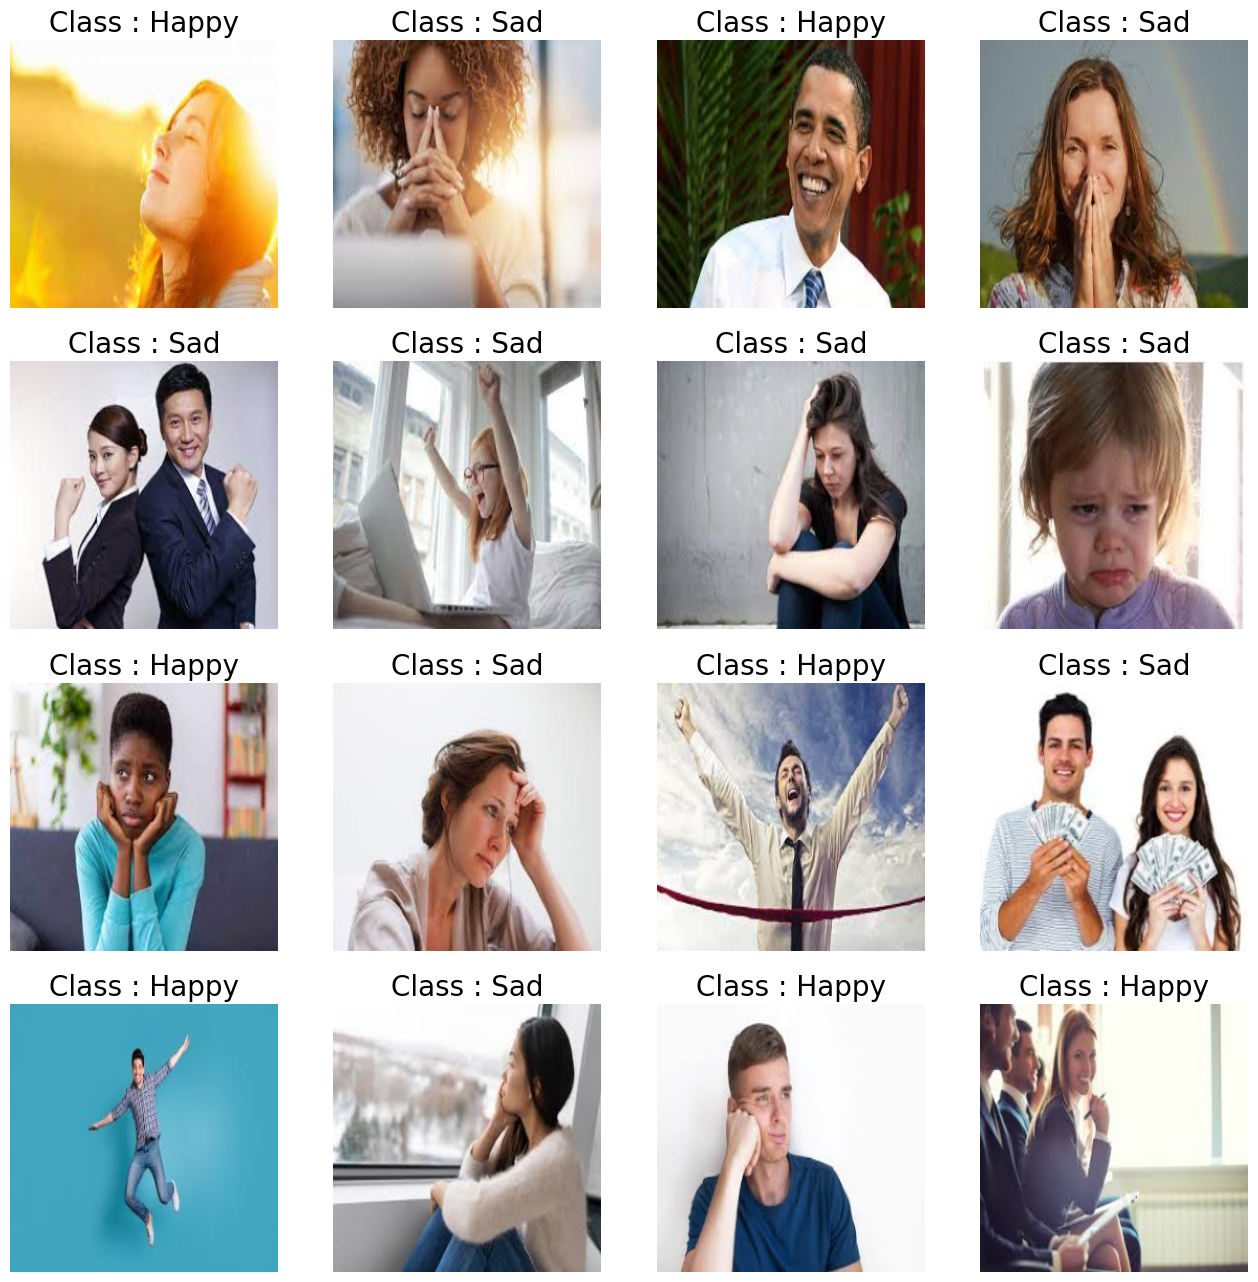

In [11]:
fig,ax = plt.subplots(nrows=4,ncols=4,figsize=(16,16))
ax = ax.flatten()
for idx in range(16):
    ax[idx].imshow(cv2.cvtColor(batch_images[idx],cv2.COLOR_BGR2RGB))
    ax[idx].axis('off')
    ax[idx].set_title("Class : {}".format("Happy" if ypred[idx] == 0 else "Sad"),fontsize=20)